<center><H1> Deep Learning and ANN Assignment 2 </H1></center><br/>
<center><H1> Student Id: 2021AIML064 </H1></center><br/>
<center><H1> Student Name:Jagadish Yalla </H1></center><br/>

Problem Statement: Collection of yoga images covering 5 different poses.

DataSet: Comprises of yoga pose images. Use 'train' folder images for training the model and  'test' for reporting the final numbers of F1 Score and the model accuracy.

Files: archive.zip Download archive.zip

Tasks: (You are free to use python libraries to solve the below tasks)

1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training.  [2 points]

2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [3 points]

conv --> A --> pool

(conv --> A) --> (conv --> A) --> pool

full connected layer --> A

softmax classifier

3. Train the CNN model for E epoch (take E=25), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [3 points]

4. Evaluate the trained CNN model on test data. Print classification results. [1 point]

5. Can you try to make changes in any way in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model.

Plot precision and recall for default and improved model in a single bar plot. [2+1 points]

Note: All the outputs of above tasks, namely code for Step-1 and Step-2, plots of step-3, step-5, and the print result of step-4  should be in a single notebook.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications

from keras.preprocessing import image
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers

import warnings
warnings.filterwarnings("ignore")

### 1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training.  [2 points]

In [2]:
train_dir = "DATASET/TRAIN"
test_dir = "DATASET/TEST"

In [3]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

In [4]:
training_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           color_mode = "rgb",
                                           class_mode = "categorical",
                                           batch_size = 32
                                           )

testing_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         color_mode = "rgb",
                                         class_mode = "categorical",
                                         batch_size = 32
                                         )

Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [5]:
print(training_data.class_indices)

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}


In [6]:
print(testing_data.class_indices)

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}


### 2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [3 points]

conv --> A --> pool

(conv --> A) --> (conv --> A) --> pool

full connected layer --> A

softmax classifier

In [7]:
#Initialising the CNN
model = keras.Sequential([
    # conv --> A --> pool
    layers.Convolution2D(4, (3,3), input_shape=(224,224,3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)), 
    
    # (conv --> A) --> (conv --> A) --> pool
    layers.Convolution2D(2, (3,3), padding='same', activation = 'relu'),
    layers.Convolution2D(2, (3,3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    
    # full connected layer --> A
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    
    # Softmax classifier
    layers.Dense(training_data.num_classes, activation = 'softmax'),
])

# Compiling the CNN
model.compile(
    optimizer='adam', 
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()],
    loss='categorical_crossentropy',
)

In [8]:
# display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 2)       74        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 2)       38        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 2)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

### 3. Train the CNN model for E epoch (take E=25), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [3 points]

In [9]:
EPOCHS = 25

In [10]:
es  = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
ckpt= ModelCheckpoint("default_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
history = model.fit(
    training_data,
    validation_data=testing_data,
    epochs=EPOCHS,
    callbacks =[es, ckpt],
)

Epoch 1/25
34/34 [==============================] - ETA: 0s - loss: 1.6862 - accuracy: 0.2211 - precision: 0.2222 - recall: 0.0111
Epoch 00001: val_accuracy improved from -inf to 0.25106, saving model to default_model.h5
34/34 [==============================] - 170s 5s/step - loss: 1.6862 - accuracy: 0.2211 - precision: 0.2222 - recall: 0.0111 - val_loss: 1.5899 - val_accuracy: 0.2511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
34/34 [==============================] - ETA: 0s - loss: 1.5924 - accuracy: 0.2470 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 00002: val_accuracy improved from 0.25106 to 0.25745, saving model to default_model.h5
34/34 [==============================] - 138s 4s/step - loss: 1.5924 - accuracy: 0.2470 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5656 - val_accuracy: 0.2574 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 1.5834 - accuracy: 0.2646 - pre

In [13]:
model = load_model("default_model.h5")

In [14]:
# save the history of train_loss, train_acc, validation_loss, validation_acc for epochs
training_loss=history.history['loss']
training_accuracy=history.history['accuracy']
validation_loss=history.history['val_loss']
validation_accuracy=history.history['val_accuracy']

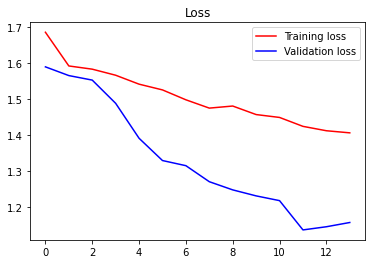

In [15]:
# plot the history of train_loss, validation_loss across epochs
plt.title("Loss")
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

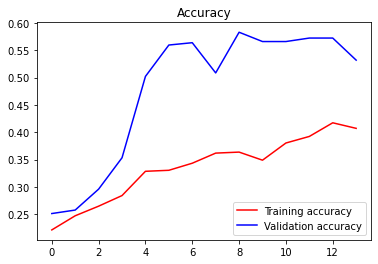

In [16]:
# plot the history of train_accuracy, validation_accuracy across epochs
plt.title("Accuracy")
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

### 4. Evaluate the trained CNN model on test data. Print classification results. [1 point]

In [17]:
# evaluate the trained model and predict using the model
result = model.evaluate(testing_data, verbose=0)

print("Test Loss: {:.2f}".format(result[0]))
print("Test Accuracy: {:.2f}%".format(result[1] * 100))
print("Final Precision: {:.2f}".format(result[2]))
print("Final Recall: {:.2f}".format(result[3]))

Test Loss: 1.25
Test Accuracy: 58.30%
Final Precision: 0.88
Final Recall: 0.06


In [20]:
# decode the predicted labels

labels = (testing_data.class_indices)
labels = dict((v,k) for k,v in labels.items())

y_pred=[]
for i in range (testing_data.n):
    test_image = image.load_img(testing_data.filepaths[i], target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    predicted = model.predict(test_image)
    predicted = np.argmax(predicted, axis = 1)
    y_pred.append(predicted[0])

y_test = testing_data.labels

In [21]:
# print the classification report for the default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.54      0.57        97
           1       0.35      0.11      0.17        80
           2       0.63      0.71      0.67       115
           3       0.62      0.81      0.70        69
           4       0.53      0.67      0.59       109

    accuracy                           0.58       470
   macro avg       0.55      0.57      0.54       470
weighted avg       0.55      0.58      0.55       470



In [22]:
# print the classification report for the default model
print(confusion_matrix(y_test, y_pred))

[[52  3 32  0 10]
 [14  9 10 13 34]
 [12  1 82  2 18]
 [ 2  6  2 56  3]
 [ 4  7  5 20 73]]


In [23]:
# store the precision and recall obtained with this default model
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [24]:
precision

0.5471051572611481

In [25]:
recall

0.5685889852056853

### 5. Can you try to make changes in any way in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model.Plot precision and recall for default and improved model in a single bar plot. [2+1 points]

In [26]:
es  = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
ckpt= ModelCheckpoint("improved_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [27]:
# lets transfer learning from VGG16 model 
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# Top Model Block
x = base_model.output
x = layers.Flatten()(x)
predictions = Dense(training_data.num_classes, activation='softmax')(x)

# add top layer block to base model
improved_model = Model(base_model.input, predictions)

# skip re-training base layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model
improved_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [28]:
# display model summary
improved_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [29]:
improved_history = improved_model.fit(
    training_data,
    validation_data=testing_data,
    epochs=EPOCHS,
    callbacks =[es, ckpt],
)

Epoch 1/25
34/34 [==============================] - ETA: 0s - loss: 1.4429 - accuracy: 0.4968 - precision_1: 0.5945 - recall_1: 0.4015
Epoch 00001: val_accuracy improved from -inf to 0.90213, saving model to improved_model.h5
34/34 [==============================] - 408s 12s/step - loss: 1.4429 - accuracy: 0.4968 - precision_1: 0.5945 - recall_1: 0.4015 - val_loss: 0.3047 - val_accuracy: 0.9021 - val_precision_1: 0.9145 - val_recall_1: 0.8872
Epoch 2/25
34/34 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.7734 - precision_1: 0.8521 - recall_1: 0.7142
Epoch 00002: val_accuracy improved from 0.90213 to 0.94894, saving model to improved_model.h5
34/34 [==============================] - 298s 9s/step - loss: 0.6574 - accuracy: 0.7734 - precision_1: 0.8521 - recall_1: 0.7142 - val_loss: 0.1862 - val_accuracy: 0.9489 - val_precision_1: 0.9545 - val_recall_1: 0.9383
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 0.4590 - accuracy: 0.8492 - precisio

In [30]:
improved_model = load_model("improved_model.h5")

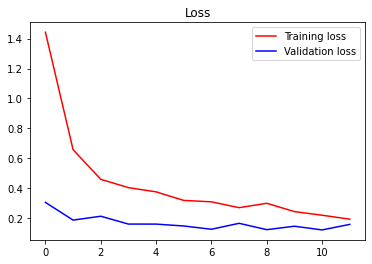

In [31]:
# plot the history of train_loss, validation_loss across epochs
plt.title("Loss")
plt.plot(improved_history.history['loss'], 'r', label='Training loss')
plt.plot(improved_history.history['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

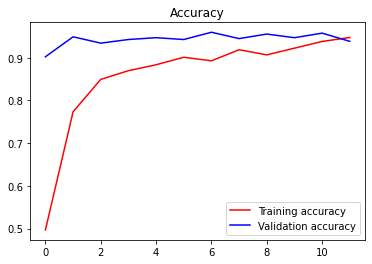

In [32]:
# plot the history of train_accuracy, validation_accuracy across epochs
plt.title("Accuracy")
plt.plot(improved_history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(improved_history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

In [33]:
# evaluate the trained model and predict using the model
result = improved_model.evaluate(testing_data, verbose=0)

print("Test Loss: {:.2f}".format(result[0]))
print("Test Accuracy: {:.2f}%".format(result[1] * 100))


Test Loss: 0.13
Test Accuracy: 95.96%


In [34]:
# decode the predicted labels

labels = (testing_data.class_indices)
labels = dict((v,k) for k,v in labels.items())

y_pred=[]
for i in range (testing_data.n):
    test_image = image.load_img(testing_data.filepaths[i], target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    predicted = improved_model.predict(test_image)
    predicted = np.argmax(predicted, axis = 1)
    y_pred.append(predicted[0])

y_test = testing_data.labels

In [35]:
# print the classification report for the improved model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        97
           1       0.95      0.75      0.84        80
           2       0.90      0.97      0.93       115
           3       0.80      0.99      0.88        69
           4       0.91      0.90      0.90       109

    accuracy                           0.91       470
   macro avg       0.91      0.90      0.90       470
weighted avg       0.91      0.91      0.91       470



In [36]:
# store the precision and recall obtained with this improved model
improved_precision, improved_recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

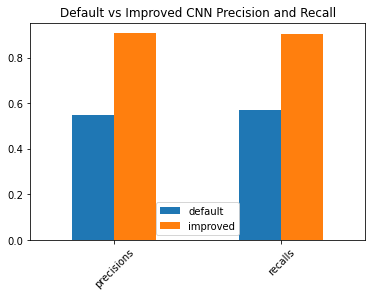

In [37]:
# compare the precision and recall parameters obtained in the default and the improved models
data = {"default":[precision, recall], "improved":[improved_precision, improved_recall]}
df = pd.DataFrame(data=data, index=["precisions", "recalls"]);
df.plot.bar(rot=45, title="Default vs Improved CNN Precision and Recall");
plt.show();